In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


In [7]:
df = pd.read_excel('StockX-Data-Contest-2019-3.xlsx',sheet_name = 'Raw Data')

In [8]:
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island


In [9]:
df.shape

(99956, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
Order Date      99956 non-null datetime64[ns]
Brand           99956 non-null object
Sneaker Name    99956 non-null object
Sale Price      99956 non-null float64
Retail Price    99956 non-null int64
Release Date    99956 non-null datetime64[ns]
Shoe Size       99956 non-null float64
Buyer Region    99956 non-null object
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 6.1+ MB


In [12]:
df.isnull().values.any()

False

Quantity bought of each brand

In [15]:
df['Brand'].value_counts()

 Yeezy       72162
Off-White    27794
Name: Brand, dtype: int64

How many different sneakers are there?

In [16]:
df['Sneaker Name'].nunique()

50

Name of sneakers in the data

In [24]:
df['Sneaker Name'].unique()

array(['Adidas-Yeezy-Boost-350-Low-V2-Beluga',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Copper',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Green',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Red',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-White',
       'Adidas-Yeezy-Boost-350-V2-Cream-White',
       'Adidas-Yeezy-Boost-350-V2-Zebra',
       'Adidas-Yeezy-Boost-350-Low-Moonrock', 'Nike-Air-Max-90-Off-White',
       'Nike-Air-Presto-Off-White', 'Nike-Air-VaporMax-Off-White',
       'Air-Jordan-1-Retro-High-Off-White-Chicago',
       'Nike-Blazer-Mid-Off-White',
       'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016',
       'Adidas-Yeezy-Boost-350-Low-Oxford-Tan',
       'Adidas-Yeezy-Boost-350-Low-Turtledove',
       'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015',
       'Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow',
       'Nike-Air-Force-1-Low-Off-White', 'Nike-Air-Max-97-Off-White',
       'Nike-Air-Force-1-Low-Virgil

How many different regions are there?

In [17]:
df['Buyer Region'].nunique()

51

What are the regions?

In [23]:
df['Buyer Region'].unique()

array(['California', 'Kentucky', 'Rhode Island', 'Michigan', 'New York',
       'Kansas', 'Florida', 'New Jersey', 'Texas', 'North Carolina',
       'Oregon', 'Alabama', 'Delaware', 'Virginia', 'Wisconsin',
       'Colorado', 'Massachusetts', 'Pennsylvania', 'Louisiana',
       'Washington', 'Georgia', 'Ohio', 'Nebraska', 'Oklahoma',
       'Connecticut', 'Missouri', 'South Carolina', 'Maine', 'Illinois',
       'Nevada', 'Maryland', 'Arizona', 'Minnesota', 'Iowa', 'Tennessee',
       'West Virginia', 'Indiana', 'Arkansas', 'Alaska', 'Wyoming',
       'Utah', 'New Hampshire', 'Vermont', 'District of Columbia',
       'Hawaii', 'New Mexico', 'South Dakota', 'Mississippi',
       'North Dakota', 'Idaho', 'Montana'], dtype=object)

Highest sale price

In [20]:
df[df['Sale Price'] == df['Sale Price'].max()]

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
26870,2018-05-26,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,4050.0,190,2017-09-09,6.0,Wisconsin


Lowest sale price

In [21]:
df[df['Sale Price']== df ['Sale Price'].min()]

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
70545,2018-12-05,Yeezy,Adidas-Yeezy-Boost-350-V2-Sesame,186.0,220,2018-11-23,4.0,New Jersey


In [22]:
df.describe()


,Sale Price,Retail Price,Shoe Size
count,99956.000000,99956.00000,99956.000000
mean,446.634754,208.61359,9.344181
std,255.982918,25.20001,2.329588
min,186.000000,130.00000,3.500000
25%,275.000000,220.00000,8.000000
50%,370.000000,220.00000,9.500000
75%,540.000000,220.00000,11.000000
max,4050.000000,250.00000,17.000000


Create Profit Margin Column

In [29]:
df['Profit Margin'] = ((df['Sale Price']-df['Retail Price'])/ df['Sale Price']).round(4)

In [30]:
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit Margin
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California,0.7995
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California,0.6788
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California,0.6812
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky,0.7953
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island,0.7343


How could I forget profit?

In [31]:
df['Profit'] = df['Sale Price']-df['Retail Price']

In [32]:
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit Margin,Profit
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California,0.7995,877.0
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California,0.6788,465.0
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California,0.6812,470.0
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky,0.7953,855.0
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island,0.7343,608.0


What shoes were bought under retail?

In [35]:
Loss = df[df['Profit']< 0]

What brand had a loss?

In [36]:
Loss['Brand'].unique()

array([' Yeezy'], dtype=object)

What shoes were undervalued?

In [37]:
Loss['Sneaker Name'].unique()

array(['Adidas-Yeezy-Boost-350-V2-Cream-White',
       'adidas-Yeezy-Boost-350-V2-Butter',
       'Adidas-Yeezy-Boost-350-V2-Sesame',
       'Adidas-Yeezy-Boost-350-V2-Beluga-2pt0',
       'Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow'], dtype=object)

Text(0, 0.5, 'Quantity')

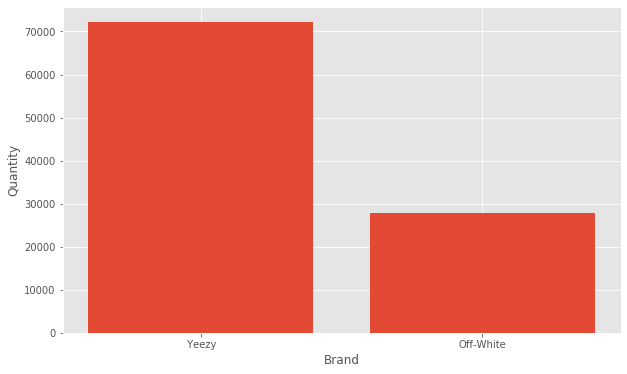

In [232]:

fig,ax = plt.subplots(figsize = (10,6))
ax.bar(brand,brand_count )
ax.set_xlabel('Brand')
ax.set_ylabel('Quantity')

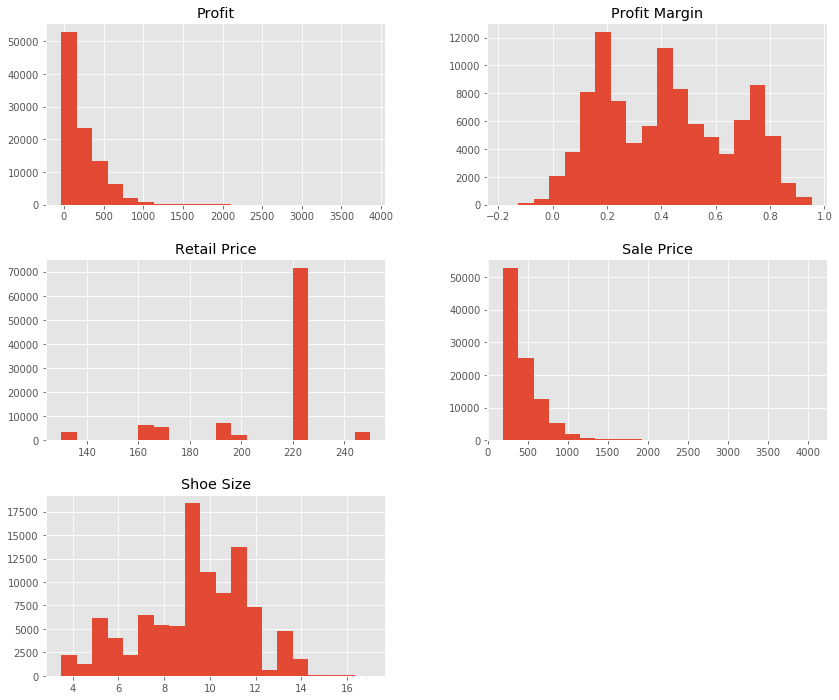

In [235]:
df.hist(figsize = (14,12), bins = 20);


In [187]:
df['region'] = df['Buyer Region'].apply(lambda x : region(x) )
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit Margin,Profit,region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California,0.7995,877.0,West
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California,0.6788,465.0,West
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California,0.6812,470.0,West
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky,0.7953,855.0,South
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island,0.7343,608.0,Northeast


In [186]:
def region(x):
    region = {0:['Arizona', 'Colorodo', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii','Oregon', 'Washington'], 1: ['Deleware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District of Columbia', 'West Virginia','Alabama', 'Kentucky','Mississippi','Tennessee','Arkansas', 'Louisiana','Oklahoma','Texas'],2: ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin','Iowa', 'Kansas','Minnesota','Missouri','Nebraska', 'North Dakota', 'South Dakota'], 3: ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']} 
    numerical = {0: 'West', 1:'South', 2: 'Midwest', 3:'Northeast'}
    if x in region[0]:
        return numerical[0]
    elif x in region[1]:
        return numerical[1]
    elif x in region[2]:
        return numerical[2]
    else:
        return numerical[3]

In [233]:
df.isnull().values.any()

False

In [287]:
def bar_plot(x, y, x_label, y_label,color = False horizontal = False):
		fig,ax = plt.subplots(figsize = (10,6))
		if horizontal:
			ax.barh(x,y, align = 'center')
			ax.set_xlabel(x_label)
			ax.set_ylabel(y_label)
		else:
			ax.bar(x,y, width = .35)
			ax.set_xlabel(x_label)
			ax.set_ylabel(y_label)
        


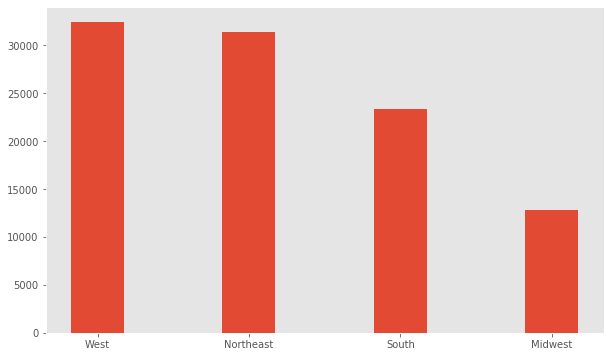

In [278]:
total = df['region'].value_counts()
fig, ax = plt.subplots(figsize = (10,6))
ax.bar(total.index,total, width = .35)
ax.grid(False)


Purchasing by Region

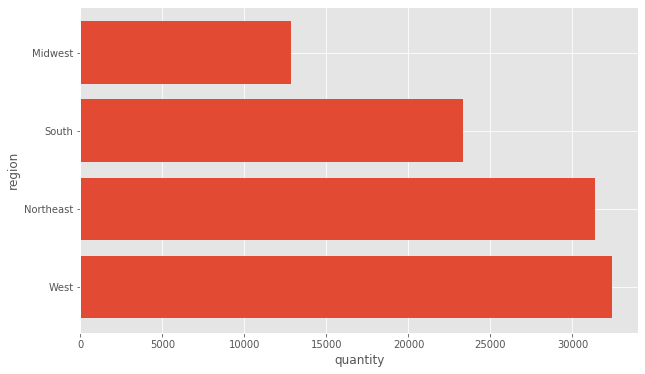

In [290]:
bar_plot(total.index,total,'quantity', 'region', horizontal = True)


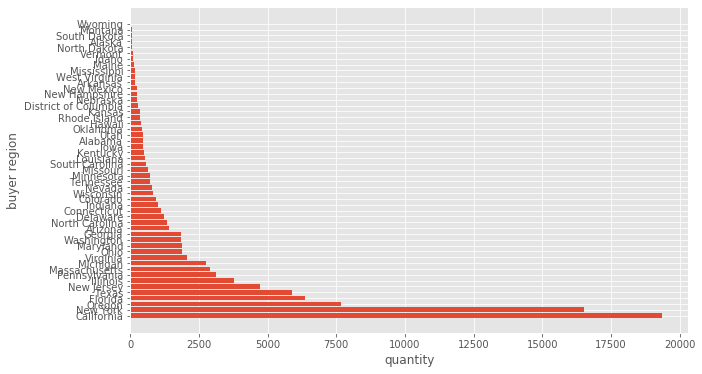

In [292]:
buyer_quantity = df['Buyer Region'].value_counts()
bar_plot(buyer_quantity.index, buyer_quantity,'quantity', 'buyer region', horizontal = True)

Top 5 States Purchasing

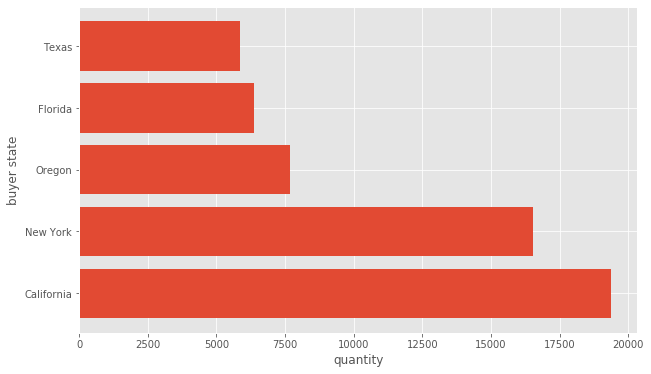

In [504]:
top_5 = buyer_quantity.head(5)
bar_plot(top_5.index, top_5, 'quantity', 'buyer state', horizontal = True)

Spending by region and state

In [553]:
buyer_region_spending = df.groupby('Buyer Region')['Sale Price'].sum().sort_values(ascending= False)
buyer_region_spending

Buyer Region
West         1.528840e+07
Northeast    1.382559e+07
South        1.005708e+07
Midwest      5.472745e+06
Name: Sale Price, dtype: float64

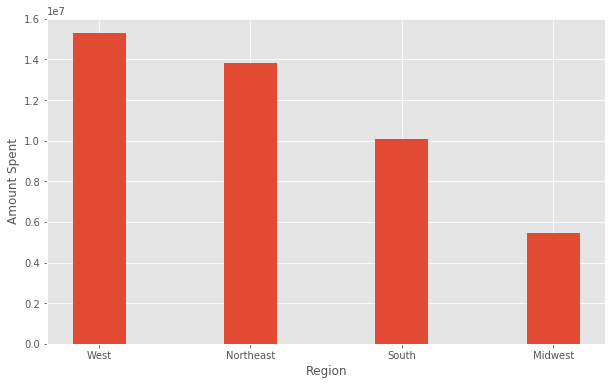

In [554]:
bar_plot(buyer_region_spending.index, buyer_region_spending, 'Region', 'Amount Spent')

In [312]:
df.rename(columns = {'Buyer Region': 'Buyer State', 'region': 'Buyer Region'}, inplace = True)

,Order Date,Release Date,Brand,Sneaker Name,Retail Price,Sale Price,Profit,Profit Margin,Shoe Size,Buyer State,Buyer Region
0,2017-09-01,2016-09-24,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,220,1097.0,877.0,0.7995,11.0,California,West
1,2017-09-01,2016-11-23,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,220,685.0,465.0,0.6788,11.0,California,West
2,2017-09-01,2016-11-23,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,220,690.0,470.0,0.6812,11.0,California,West
3,2017-09-01,2016-11-23,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,220,1075.0,855.0,0.7953,11.5,Kentucky,South
4,2017-09-01,2017-02-11,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,220,828.0,608.0,0.7343,11.0,Rhode Island,Northeast
...,...,...,...,...,...,...,...,...,...,...,...
99951,2019-02-13,2018-12-26,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,220,565.0,345.0,0.6106,8.0,Oregon,West
99952,2019-02-13,2018-12-26,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,220,598.0,378.0,0.6321,8.5,California,West
99953,2019-02-13,2018-12-26,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,220,605.0,385.0,0.6364,5.5,New York,Northeast
99954,2019-02-13,2018-12-26,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,220,650.0,430.0,0.6615,11.0,California,West


In [316]:
df= df[['Order Date','Release Date', 'Brand', 'Sneaker Name', 'Retail Price', 'Sale Price','Profit','Profit Margin','Shoe Size','Buyer State', 'Buyer Region']]

In [321]:
df.head(240)

,Order Date,Release Date,Brand,Sneaker Name,Retail Price,Sale Price,Profit,Profit Margin,Shoe Size,Buyer State,Buyer Region
0,2017-09-01,2016-09-24,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,220,1097.0,877.0,0.7995,11.0,California,West
1,2017-09-01,2016-11-23,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,220,685.0,465.0,0.6788,11.0,California,West
2,2017-09-01,2016-11-23,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,220,690.0,470.0,0.6812,11.0,California,West
3,2017-09-01,2016-11-23,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,220,1075.0,855.0,0.7953,11.5,Kentucky,South
4,2017-09-01,2017-02-11,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,220,828.0,608.0,0.7343,11.0,Rhode Island,Northeast
...,...,...,...,...,...,...,...,...,...,...,...
235,2017-09-12,2016-02-19,Yeezy,Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016,200,1000.0,800.0,0.8000,10.0,Florida,South
236,2017-09-12,2016-09-24,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,220,985.0,765.0,0.7766,9.0,Maryland,South
237,2017-09-12,2016-09-24,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,220,985.0,765.0,0.7766,10.5,North Carolina,South
238,2017-09-12,2016-11-23,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,220,650.0,430.0,0.6615,9.5,Oregon,West


Boxplots to look at distribution of columns

In [331]:
sale_price_off_white = df[df['Brand']=='Off-White']['Sale Price']
len(sale_price_off_white)

27794

In [341]:
df['Brand']= df['Brand'].apply(lambda x : x.replace(' ', ''))

In [345]:
sale_price_yeezy = df[df['Brand']=='Yeezy']['Sale Price']
len(sale_price_yeezy)

72162

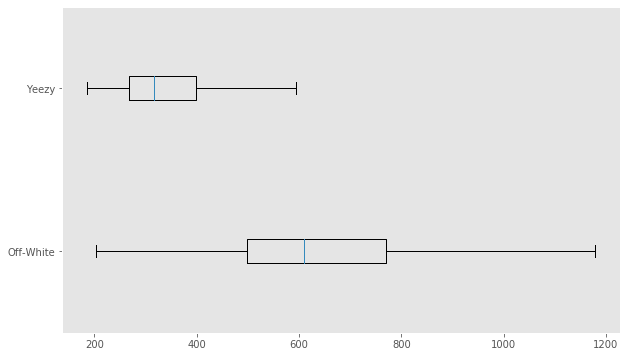

In [407]:
fig, ax = plt.subplots(figsize = (10,6))
ax.boxplot([sale_price_off_white,sale_price_yeezy], showfliers = False, vert = False);
ax.set_yticklabels(['Off-White', 'Yeezy'])
ax.grid(False)

In [359]:
sale_price_off_white.describe()

count    27794.000000
mean       671.481226
std        334.654897
min        203.000000
25%        498.000000
50%        610.000000
75%        770.000000
max       4050.000000
Name: Sale Price, dtype: float64

In [369]:
ow_iqr = 770-498
off_white_upper_outlier =770+(1.5*ow_iqr)
off_white_lower_outlier = 498 -(1.5*ow_iqr)
print(off_white_lower_outlier)
print(off_white_upper_outlier)

90.0
1178.0


How many outliers are there for Off-White shoes?

In [385]:
off_white_sale_price_outliers =  df[(df['Sale Price'] <= 90) | (df['Sale Price'] >= 1178)]
off_white_sale_price_outliers = off_white_sale_price_outliers[off_white_sale_price_outliers['Brand']=='Off-White']
off_white_sale_price_outliers.shape[0]

1674

In [386]:
off_white_sale_price_outliers['Sneaker Name'].unique()

array(['Nike-Air-Max-90-Off-White', 'Nike-Air-Presto-Off-White',
       'Nike-Air-VaporMax-Off-White',
       'Air-Jordan-1-Retro-High-Off-White-Chicago',
       'Nike-Zoom-Fly-Off-White', 'Nike-Air-Force-1-Low-Off-White',
       'Nike-Blazer-Mid-Off-White',
       'Air-Jordan-1-Retro-High-Off-White-White',
       'Nike-Air-VaporMax-Off-White-2018',
       'Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100',
       'Nike-Air-Max-97-Off-White',
       'Air-Jordan-1-Retro-High-Off-White-University-Blue',
       'Nike-Air-Presto-Off-White-Black-2018',
       'Nike-Air-Presto-Off-White-White-2018',
       'Nike-Air-Max-97-Off-White-Elemental-Rose-Queen',
       'Nike-Blazer-Mid-Off-White-All-Hallows-Eve',
       'Nike-Blazer-Mid-Off-White-Wolf-Grey',
       'Nike-Air-Max-97-Off-White-Black',
       'Nike-Air-Max-97-Off-White-Menta',
       'Nike-Air-VaporMax-Off-White-Black'], dtype=object)

In [358]:
df[(df['Sale Price'] ==203.0) & (df['Brand'] == 'Off-White')]

,Order Date,Release Date,Brand,Sneaker Name,Retail Price,Sale Price,Profit,Profit Margin,Shoe Size,Buyer State,Buyer Region
82740,2018-12-29,2018-06-14,Off-White,Nike-Zoom-Fly-Mercurial-Off-White-Total-Orange,200,203.0,3.0,0.0148,7.0,Illinois,Midwest


In [360]:
df[(df['Sale Price'] ==4050.0) & (df['Brand'] == 'Off-White')]

,Order Date,Release Date,Brand,Sneaker Name,Retail Price,Sale Price,Profit,Profit Margin,Shoe Size,Buyer State,Buyer Region
26870,2018-05-26,2017-09-09,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,190,4050.0,3860.0,0.9531,6.0,Wisconsin,Midwest


Yeezy Outliers?

In [361]:
sale_price_yeezy.describe()

count    72162.000000
mean       360.032625
std        143.732130
min        186.000000
25%        268.000000
50%        316.000000
75%        399.000000
max       2300.000000
Name: Sale Price, dtype: float64

In [388]:
yeezy_iqr = 399-268
yeezy_upper_outlier = 399 +(1.5*yeezy_iqr)
yeezy_lower_outlier = 268-(1.5*yeezy_iqr)
print(yeezy_lower_outlier)
print(yeezy_upper_outlier)

71.5
595.5


In [390]:
df[(df['Sale Price'] == 186) & (df['Brand']== 'Yeezy')]

,Order Date,Release Date,Brand,Sneaker Name,Retail Price,Sale Price,Profit,Profit Margin,Shoe Size,Buyer State,Buyer Region
70545,2018-12-05,2018-11-23,Yeezy,Adidas-Yeezy-Boost-350-V2-Sesame,220,186.0,-34.0,-0.1828,4.0,New Jersey,Northeast


In [391]:
df[(df['Sale Price'] == 2300) & (df['Brand']== 'Yeezy')]

,Order Date,Release Date,Brand,Sneaker Name,Retail Price,Sale Price,Profit,Profit Margin,Shoe Size,Buyer State,Buyer Region
298,2017-09-14,2015-06-27,Yeezy,Adidas-Yeezy-Boost-350-Low-Turtledove,200,2300.0,2100.0,0.913,14.0,Iowa,Midwest


How many outliers for Yeezys?


In [393]:
yeezy_sale_price_outliers =  df[(df['Sale Price'] <= 71.5) | (df['Sale Price'] >= 595.5)]
yeezy_sale_price_outliers = yeezy_sale_price_outliers[yeezy_sale_price_outliers['Brand']=='Yeezy']
yeezy_sale_price_outliers.shape[0]

4851

In [394]:
yeezy_sale_price_outliers['Sneaker Name'].unique()

array(['Adidas-Yeezy-Boost-350-Low-V2-Beluga',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Copper',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Green',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Red',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-White',
       'Adidas-Yeezy-Boost-350-V2-Zebra',
       'Adidas-Yeezy-Boost-350-Low-Moonrock',
       'Adidas-Yeezy-Boost-350-V2-Cream-White',
       'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016',
       'Adidas-Yeezy-Boost-350-Low-Oxford-Tan',
       'Adidas-Yeezy-Boost-350-Low-Turtledove',
       'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015',
       'Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow',
       'Adidas-Yeezy-Boost-350-V2-Beluga-2pt0',
       'Adidas-Yeezy-Boost-350-V2-Blue-Tint',
       'adidas-Yeezy-Boost-350-V2-Butter',
       'adidas-Yeezy-Boost-350-V2-Static',
       'adidas-Yeezy-Boost-350-V2-Static-Reflective'], dtype=object)

In [400]:
def hist_plot(x,x_label,y_label):
		fig, ax = plt.subplots(figsize = (10,6))
		ax.hist(x, bins = 25)
		ax.set_xlabel(x_label)
		ax.set_ylabel(y_label)

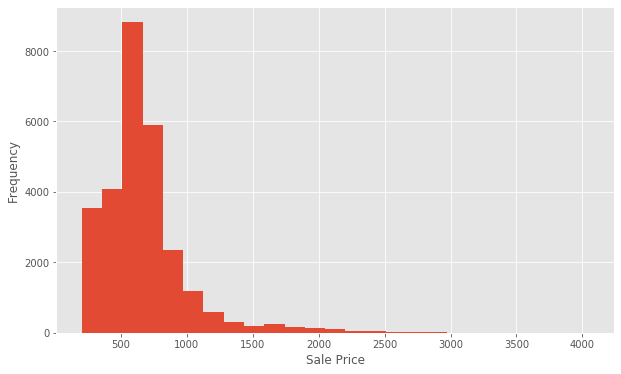

In [401]:
hist_plot(sale_price_off_white, 'Sale Price', 'Frequency')

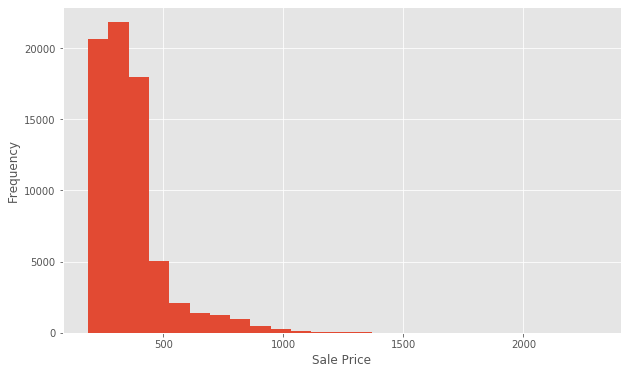

In [403]:
hist_plot(sale_price_yeezy,'Sale Price', 'Frequency')

What did each region and state spend on each brand?

In [411]:
def region_df(df, reg_name):
		return df[df['Buyer Region']== reg_name]

In [430]:
west_df = region_df(df,'West')
south_df = region_df(df,'South')
northeast_df = region_df(df, 'Northeast')
midwest_df = region_df(df,'Midwest')


In [420]:
def brand_count(region_df):
			return region_df['Brand'].value_counts()

In [434]:
west_brand_count = brand_count(west_df)
south_brand_count = brand_count(south_df)
northeast_brand_count = brand_count(northeast_df)
midwest_brand_count = brand_count(midwest_df)

In [539]:
west_brand_count

Yeezy        22337
Off-White    10065
Name: Brand, dtype: int64

In [423]:
south_brand_count

Yeezy        17117
Off-White     6221
Name: Brand, dtype: int64

In [435]:
northeast_brand_count

Yeezy        23030
Off-White     8337
Name: Brand, dtype: int64

In [425]:
midwest_brand_count

Yeezy        9678
Off-White    3171
Name: Brand, dtype: int64

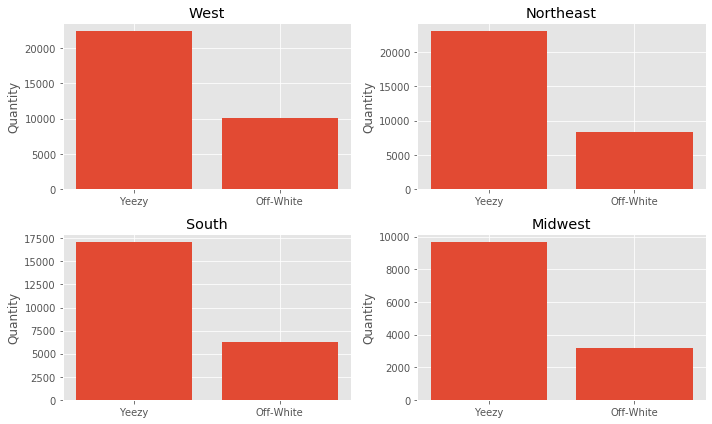

In [542]:
x = west_brand_count.index
y = [west_brand_count,northeast_brand_count,south_brand_count,midwest_brand_count]
title= ['West', 'Northeast', 'South', 'Midwest']
fig, axs = plt.subplots(2,2, figsize =(10,6))
for i, ax in enumerate(axs.flatten()):
    ax.bar(x,y[i])
    ax.set_title(title[i])
    ax.set_ylabel('Quantity')
plt.tight_layout()

Region Spending by Brand

In [567]:
def reg_spending(reg_df):
    return reg_df.groupby('Brand')['Sale Price'].sum()

w_spent = reg_spending(west_df)
ne_spent = reg_spending(northeast_df)
s_spent = reg_spending(south_df)
mw_spent = reg_spending(midwest_df)


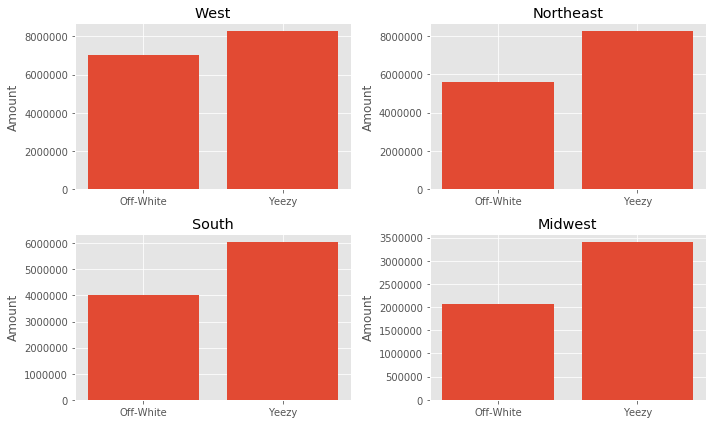

In [568]:
x = w_spent.index
y = [w_spent, ne_spent,s_spent, mw_spent]
title= ['West', 'Northeast', 'South', 'Midwest']
fig, axs = plt.subplots(2,2, figsize =(10,6))
for i, ax in enumerate(axs.flatten()):
    ax.bar(x,y[i])
    ax.set_title(title[i])
    ax.set_ylabel('Amount')
plt.tight_layout()

In [515]:
def state_brand_count(df, state):
		return df[df['Buyer State']==state]['Brand'].value_counts()

def state_count_list(df,lst): 
		return [state_brand_count(df,state) for state in lst]

In [533]:
ca_count= state_brand_count(df, 'California')
ny_count= state_brand_count(df, 'New York')
or_count= state_brand_count(df, 'Oregon')
fl_count= state_brand_count(df, 'Florida')
tx_count = state_brand_count(df, 'Texas')

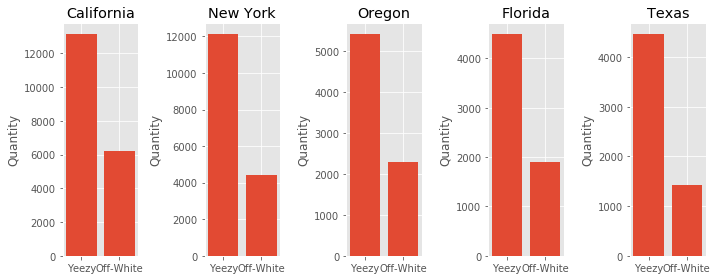

In [537]:
x = ca_count.index
y = [ca_count,ny_count,or_count,fl_count,tx_count]
title= ['California', 'New York', 'Oregon', 'Florida', 'Texas']
fig, axs = plt.subplots(1,5, figsize =(10,4))
for i, ax in enumerate(axs.flatten()):
    ax.bar(x,y[i])
    ax.set_title(title[i])
    ax.set_ylabel('Quantity')
plt.tight_layout()

In [608]:
state_spent = df.groupby(['Buyer State','Brand'])['Sale Price'].mean()
state_spent

Buyer State    Brand    
Alabama        Off-White    596.426829
               Yeezy        352.000000
Alaska         Off-White    644.400000
               Yeezy        333.463415
Arizona        Off-White    701.844665
                               ...    
West Virginia  Yeezy        336.893617
Wisconsin      Off-White    672.604762
               Yeezy        354.617460
Wyoming        Off-White    600.000000
               Yeezy        337.205128
Name: Sale Price, Length: 102, dtype: float64

In [609]:
state_spent.loc[('California', 'Yeezy')]

373.7813738503775

In [610]:
state_spent.loc[('California','Off-White')]

697.9200955099424

In [612]:
def state_spending(grouped_df, state):
		return [grouped_df.loc[(state,'Yeezy')],grouped_df.loc[(state,'Off-White')]]

def multi_state_spending(grouped_df, state_lst):
		return [state_spending(grouped_df, state) for state in state_lst]	
def multi_bar(x, y,rows, columns,  title, ylabel):
    fig, axs = plt.subplots(rows, columns, figsize =(10,6))
    for i, ax in enumerate(axs.flatten()):
        ax.bar(x,y[i])
        ax.set_title(title[i])
        ax.set_ylabel(ylabel)
    plt.tight_layout()

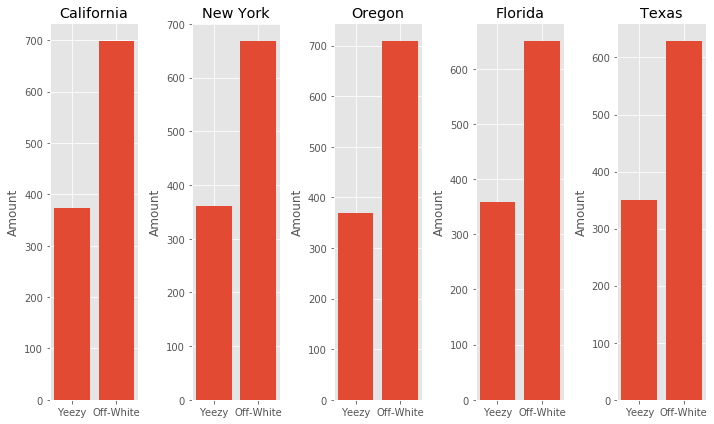

In [613]:
top_5_states = ['California', 'New York', 'Oregon', 'Florida', 'Texas']
y = multi_state_spending(state_spent, top_5_states)
x = ['Yeezy', 'Off-White']
title = top_5_states
y_label = 'Amount'

multi_bar(x,y,1,5,title,y_label)


Profit and Profit Margin Exploration 

In [646]:
def box_plot(data,xticklabels, label, showfliers = False, vert = False):
		fig, ax = plt.subplots(figsize = (10,6))
		ax.grid(False)
		ax.boxplot(data, showfliers =showfliers, vert = vert)
		if vert:
			ax.set_xticklabels(xticklabels)
			ax.set_ylabel(ylabel)
		else:
			ax.set_yticklabels(xticklabels)
			ax.set_xlabel(label)


In [604]:
average_profit = df.groupby('Brand')['Profit'].mean()

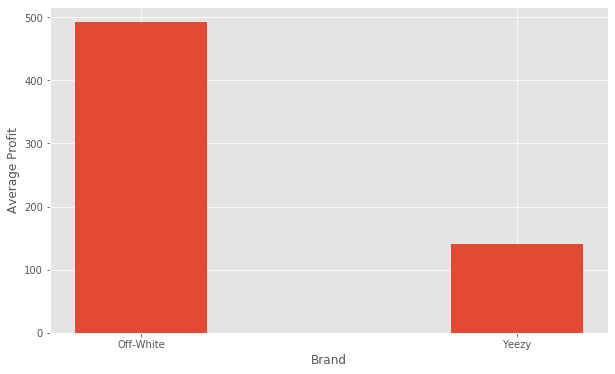

In [605]:
bar_plot(average_profit.index, average_profit,'Brand', 'Average Profit')

In [614]:
average_profit_margin = df.groupby('Brand')['Profit Margin'].mean()

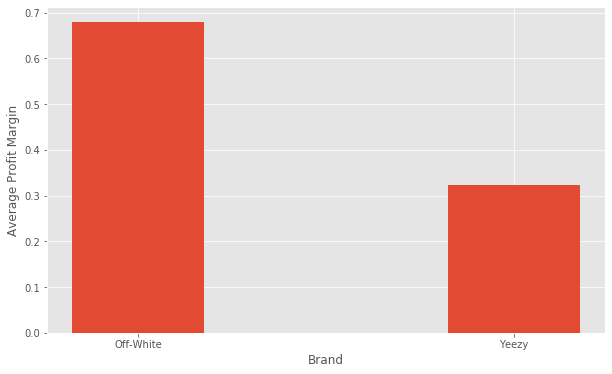

In [616]:
bar_plot(average_profit_margin.index, average_profit_margin,'Brand', 'Average Profit Margin')

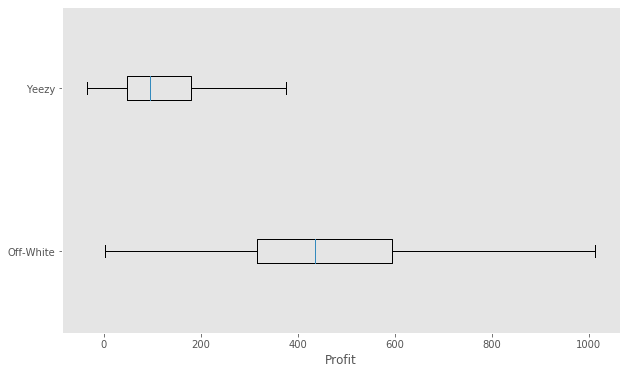

In [647]:
ow_profit = df[df['Brand']== 'Off-White']['Profit']
yeezy_profit = df[df['Brand']=='Yeezy']['Profit']
box_plot([ow_profit,yeezy_profit],['Off-White','Yeezy'],'Profit')

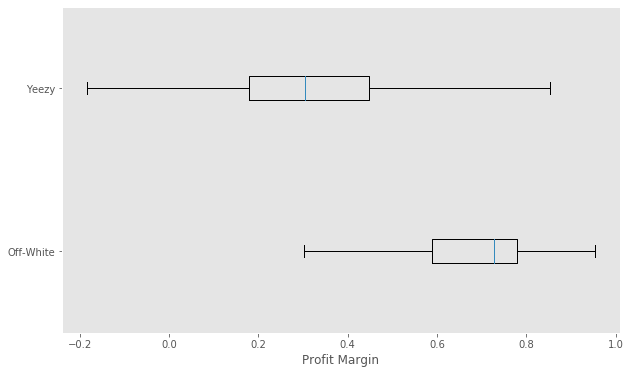

In [651]:
ow_profit_margin= df[df['Brand']== 'Off-White']['Profit Margin']
yeezy_profit_margin= df[df['Brand']== 'Yeezy']['Profit Margin']
box_plot([ow_profit_margin,yeezy_profit_margin], ['Off-White','Yeezy'],'Profit Margin')